## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras
import itertools
# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "無"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 20
BATCH_SIZE = 256
MOMENTUM = [0.7, 0.9, 0.95, 0.99]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr, momentum in itertools.product(LEARNING_RATE, MOMENTUM):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Momentum = %.2f" % (lr, momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s-momemtum-%s" % (str(lr), str(momentum))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0825 15:37:10.592570  3252 deprecation_wrapper.py:119] From C:\Users\sam0522\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0825 15:37:10.593567  3252 deprecation_wrapper.py:119] From C:\Users\sam0522\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0825 15:37:10.878804  3252 deprecation_wrapper.py:119] From C:\Users\sam0522\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0825 15:37:10.879810  3252 deprecation_wrapper.py:119] From C:\Users\sam0522\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0825 15:37:10.88479

Experiment with LR = 0.100000, Momentum = 0.70
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0825 15:37:11.097223  3252 deprecation.py:323] From C:\Users\sam0522\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 8s 164us/step - loss: 2.1029 - acc: 0.2280 - val_loss: 1.8694 - val_acc: 0.3276
Epoch 2/20
50000/50000 [==============================] - 7s 143us/step - loss: 1.8258 - acc: 0.3393 - val_loss: 1.8326 - val_acc: 0.3154
Epoch 3/20
50000/50000 [==============================] - 7s 141us/step - loss: 1.7384 - acc: 0.3777 - val_loss: 1.7137 - val_acc: 0.3719
Epoch 4/20
50000/50000 [==============================] - 7s 143us/step - loss: 1.6656 - acc: 0.4034 - val_loss: 1.7347 - val_acc: 0.3962
Epoch 5/20
50000/50000 [==============================] - 7s 144us/step - loss: 1.7063 - acc: 0.3922 - val_loss: 1.6797 - val_acc: 0.3934
Epoch 6/20
50000/50000 [==============================] - 7s 146us/step - loss: 1.6154 - acc: 0.4204 - val_loss: 1.6791 - val_acc: 0.3980
Epoch 7/20
50000/50000 [==============================] - 8s 163us/step - loss: 1.5501 - acc: 0.4459 - val_loss: 1.6862 - 

Epoch 4/20
50000/50000 [==============================] - 8s 158us/step - loss: 1.8893 - acc: 0.2988 - val_loss: 1.9310 - val_acc: 0.2945
Epoch 5/20
50000/50000 [==============================] - 8s 156us/step - loss: 1.8488 - acc: 0.3212 - val_loss: 1.8401 - val_acc: 0.3296
Epoch 6/20
50000/50000 [==============================] - 8s 154us/step - loss: 1.8263 - acc: 0.3327 - val_loss: 1.8126 - val_acc: 0.3408
Epoch 7/20
50000/50000 [==============================] - 8s 160us/step - loss: 1.8004 - acc: 0.3469 - val_loss: 1.8021 - val_acc: 0.3369
Epoch 8/20
50000/50000 [==============================] - 8s 154us/step - loss: 1.7714 - acc: 0.3601 - val_loss: 1.7505 - val_acc: 0.3654
Epoch 9/20
50000/50000 [==============================] - 8s 155us/step - loss: 1.7622 - acc: 0.3631 - val_loss: 1.7868 - val_acc: 0.3465
Epoch 10/20
50000/50000 [==============================] - 8s 154us/step - loss: 1.7488 - acc: 0.3704 - val_loss: 1.7579 - val_acc: 0.3647
Epoch 11/20
50000/50000 [========

50000/50000 [==============================] - 7s 146us/step - loss: 1.5040 - acc: 0.4684 - val_loss: 1.5888 - val_acc: 0.4351
Epoch 8/20
50000/50000 [==============================] - 8s 156us/step - loss: 1.4706 - acc: 0.4808 - val_loss: 1.5479 - val_acc: 0.4532
Epoch 9/20
50000/50000 [==============================] - 7s 147us/step - loss: 1.4436 - acc: 0.4909 - val_loss: 1.5003 - val_acc: 0.4674
Epoch 10/20
50000/50000 [==============================] - 8s 155us/step - loss: 1.4209 - acc: 0.4983 - val_loss: 1.5191 - val_acc: 0.4492
Epoch 11/20
50000/50000 [==============================] - 8s 167us/step - loss: 1.3984 - acc: 0.5065 - val_loss: 1.4409 - val_acc: 0.4856
Epoch 12/20
50000/50000 [==============================] - 7s 148us/step - loss: 1.3785 - acc: 0.5147 - val_loss: 1.5058 - val_acc: 0.4651
Epoch 13/20
50000/50000 [==============================] - 7s 147us/step - loss: 1.3606 - acc: 0.5217 - val_loss: 1.5527 - val_acc: 0.4462
Epoch 14/20
50000/50000 [================

50000/50000 [==============================] - 8s 165us/step - loss: 1.2335 - acc: 0.5615 - val_loss: 1.3586 - val_acc: 0.5184
Epoch 11/20
50000/50000 [==============================] - 8s 160us/step - loss: 1.2103 - acc: 0.5686 - val_loss: 1.3580 - val_acc: 0.5203
Epoch 12/20
50000/50000 [==============================] - 8s 157us/step - loss: 1.1865 - acc: 0.5787 - val_loss: 1.3684 - val_acc: 0.5260
Epoch 13/20
50000/50000 [==============================] - 8s 160us/step - loss: 1.1538 - acc: 0.5889 - val_loss: 1.3788 - val_acc: 0.5248
Epoch 14/20
50000/50000 [==============================] - 8s 160us/step - loss: 1.1291 - acc: 0.5982 - val_loss: 1.3522 - val_acc: 0.5268
Epoch 15/20
50000/50000 [==============================] - 8s 158us/step - loss: 1.1008 - acc: 0.6087 - val_loss: 1.3637 - val_acc: 0.5264
Epoch 16/20
50000/50000 [==============================] - 8s 158us/step - loss: 1.0751 - acc: 0.6177 - val_loss: 1.3586 - val_acc: 0.5226
Epoch 17/20
50000/50000 [==============

50000/50000 [==============================] - 8s 168us/step - loss: 1.7073 - acc: 0.4035 - val_loss: 1.7058 - val_acc: 0.4032
Epoch 14/20
50000/50000 [==============================] - 8s 164us/step - loss: 1.6946 - acc: 0.4069 - val_loss: 1.6929 - val_acc: 0.4065
Epoch 15/20
50000/50000 [==============================] - 7s 147us/step - loss: 1.6833 - acc: 0.4115 - val_loss: 1.6826 - val_acc: 0.4068
Epoch 16/20
50000/50000 [==============================] - 7s 149us/step - loss: 1.6718 - acc: 0.4146 - val_loss: 1.6769 - val_acc: 0.4131
Epoch 17/20
50000/50000 [==============================] - 7s 149us/step - loss: 1.6620 - acc: 0.4180 - val_loss: 1.6694 - val_acc: 0.4152
Epoch 18/20
50000/50000 [==============================] - 7s 149us/step - loss: 1.6521 - acc: 0.4210 - val_loss: 1.6565 - val_acc: 0.4222
Epoch 19/20
50000/50000 [==============================] - 8s 162us/step - loss: 1.6428 - acc: 0.4258 - val_loss: 1.6448 - val_acc: 0.4260
Epoch 20/20
50000/50000 [==============

50000/50000 [==============================] - 8s 167us/step - loss: 1.3271 - acc: 0.5326 - val_loss: 1.4187 - val_acc: 0.4978
Epoch 17/20
50000/50000 [==============================] - 8s 161us/step - loss: 1.3120 - acc: 0.5392 - val_loss: 1.3967 - val_acc: 0.5030
Epoch 18/20
50000/50000 [==============================] - 8s 160us/step - loss: 1.2945 - acc: 0.5459 - val_loss: 1.3957 - val_acc: 0.5058
Epoch 19/20
50000/50000 [==============================] - 8s 161us/step - loss: 1.2791 - acc: 0.5473 - val_loss: 1.3899 - val_acc: 0.5036
Epoch 20/20
50000/50000 [==============================] - 8s 162us/step - loss: 1.2628 - acc: 0.5544 - val_loss: 1.3884 - val_acc: 0.5057
Experiment with LR = 0.001000, Momentum = 0.99
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden

50000/50000 [==============================] - 8s 156us/step - loss: 2.0105 - acc: 0.2993 - val_loss: 2.0056 - val_acc: 0.3052
Epoch 20/20
50000/50000 [==============================] - 8s 161us/step - loss: 2.0014 - acc: 0.3031 - val_loss: 1.9966 - val_acc: 0.3064
Experiment with LR = 0.000100, Momentum = 0.90
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)             

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 7s 150us/step - loss: 2.2077 - acc: 0.1754 - val_loss: 2.0616 - val_acc: 0.2583
Epoch 2/20
50000/50000 [==============================] - 7s 149us/step - loss: 1.9741 - acc: 0.2974 - val_loss: 1.9038 - val_acc: 0.3345
Epoch 3/20
50000/50000 [==============================] - 7s 147us/step - loss: 1.8613 - acc: 0.3461 - val_loss: 1.8256 - val_acc: 0.3552
Epoch 4/20
50000/50000 [==============================] - 8s 153us/step - loss: 1.8015 - acc: 0.3666 - val_loss: 1.7763 - val_acc: 0.3792
Epoch 5/20
50000/50000 [==============================] - 8s 159us/step - loss: 1.7554 - acc: 0.3877 - val_loss: 1.7336 - val_acc: 0.3949
Epoch 6/20
50000/50000 [==============================] - 8s 163us/step - loss: 1.7213 - acc: 0.4005 - val_loss: 1.7027 - val_acc: 0.4023
Epoch 7/20
50000/50000 [==============================] - 8s 161us/step - loss: 1.6886 - acc: 0.4117 - val_loss: 1.6746 - 

Epoch 4/20
50000/50000 [==============================] - 8s 158us/step - loss: 2.2837 - acc: 0.1407 - val_loss: 2.2758 - val_acc: 0.1512
Epoch 5/20
50000/50000 [==============================] - 8s 158us/step - loss: 2.2728 - acc: 0.1541 - val_loss: 2.2656 - val_acc: 0.1621
Epoch 6/20
50000/50000 [==============================] - 8s 156us/step - loss: 2.2630 - acc: 0.1650 - val_loss: 2.2562 - val_acc: 0.1735
Epoch 7/20
50000/50000 [==============================] - 8s 158us/step - loss: 2.2539 - acc: 0.1737 - val_loss: 2.2474 - val_acc: 0.1799
Epoch 8/20
50000/50000 [==============================] - 8s 159us/step - loss: 2.2453 - acc: 0.1824 - val_loss: 2.2389 - val_acc: 0.1889
Epoch 9/20
50000/50000 [==============================] - 8s 159us/step - loss: 2.2370 - acc: 0.1910 - val_loss: 2.2308 - val_acc: 0.1962
Epoch 10/20
50000/50000 [==============================] - 8s 157us/step - loss: 2.2290 - acc: 0.1974 - val_loss: 2.2230 - val_acc: 0.2000
Epoch 11/20
50000/50000 [========

50000/50000 [==============================] - 8s 152us/step - loss: 2.0010 - acc: 0.2955 - val_loss: 1.9873 - val_acc: 0.2968
Epoch 8/20
50000/50000 [==============================] - 7s 149us/step - loss: 1.9734 - acc: 0.3062 - val_loss: 1.9623 - val_acc: 0.3022
Epoch 9/20
50000/50000 [==============================] - 7s 146us/step - loss: 1.9502 - acc: 0.3156 - val_loss: 1.9415 - val_acc: 0.3175
Epoch 10/20
50000/50000 [==============================] - 7s 146us/step - loss: 1.9309 - acc: 0.3243 - val_loss: 1.9233 - val_acc: 0.3250
Epoch 11/20
50000/50000 [==============================] - 7s 147us/step - loss: 1.9138 - acc: 0.3300 - val_loss: 1.9071 - val_acc: 0.3314
Epoch 12/20
50000/50000 [==============================] - 7s 146us/step - loss: 1.8989 - acc: 0.3372 - val_loss: 1.8933 - val_acc: 0.3379
Epoch 13/20
50000/50000 [==============================] - 8s 150us/step - loss: 1.8855 - acc: 0.3428 - val_loss: 1.8816 - val_acc: 0.3424
Epoch 14/20
50000/50000 [================

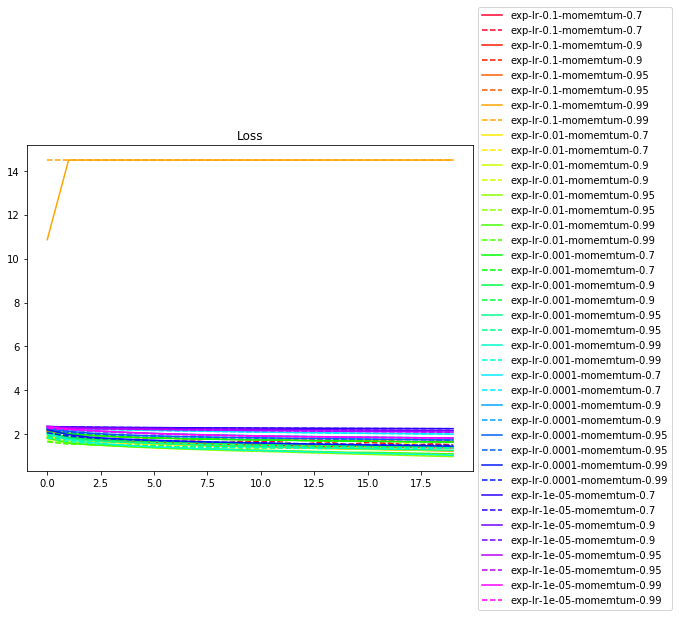

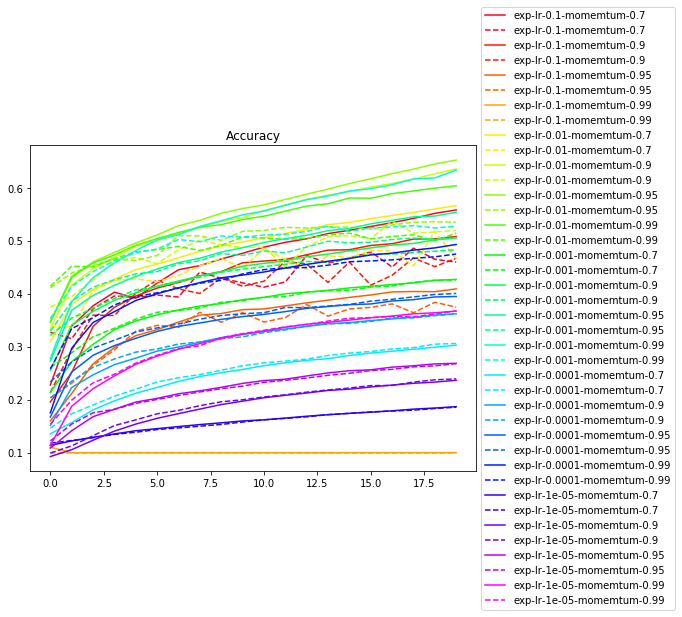

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()